In [34]:
import hnswlib
import numpy as np
from sentence_transformers import SentenceTransformer
import warnings
# import csv
warnings.filterwarnings("ignore")

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [36]:
# Step 1: Prepare the document texts
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "A journey of a thousand miles begins with a single step.",
    "To be or not to be, that is the question.",
    "All that glitters is not gold.",
    # "The pen is mightier than the sword."
    "Swami Vivekananda was a key figure in the introduction of Indian philosophies to the Western world.",
    "He is best known for his speech at the World's Parliament of Religions in Chicago in 1893.",
    "Swami Vivekananda emphasized the importance of self-realization and spiritual awakening.",
]

In [37]:
# Step 2: Create embeddings using Sentence Transformers
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(documents)


In [38]:
# Step 3: Initialize HNSW Index
dim = embeddings.shape[1]  # Dimension of the embeddings
num_elements = len(documents)  # Number of documents

# Initialize the HNSW index
hnsw_index = hnswlib.Index(space='cosine', dim=dim)

# Create the index
hnsw_index.init_index(max_elements=num_elements, ef_construction=100, M=16)
hnsw_index.add_items(embeddings)

In [39]:
# Step 4: Query the index
query = "Tell me about Swami Vivekanda."
query_embedding = model.encode([query])

# Perform the search
labels, distances = hnsw_index.knn_query(query_embedding, k=3)

# Extract nearest neighbors
nearest_labels = labels[0]
nearest_distances = distances[0]


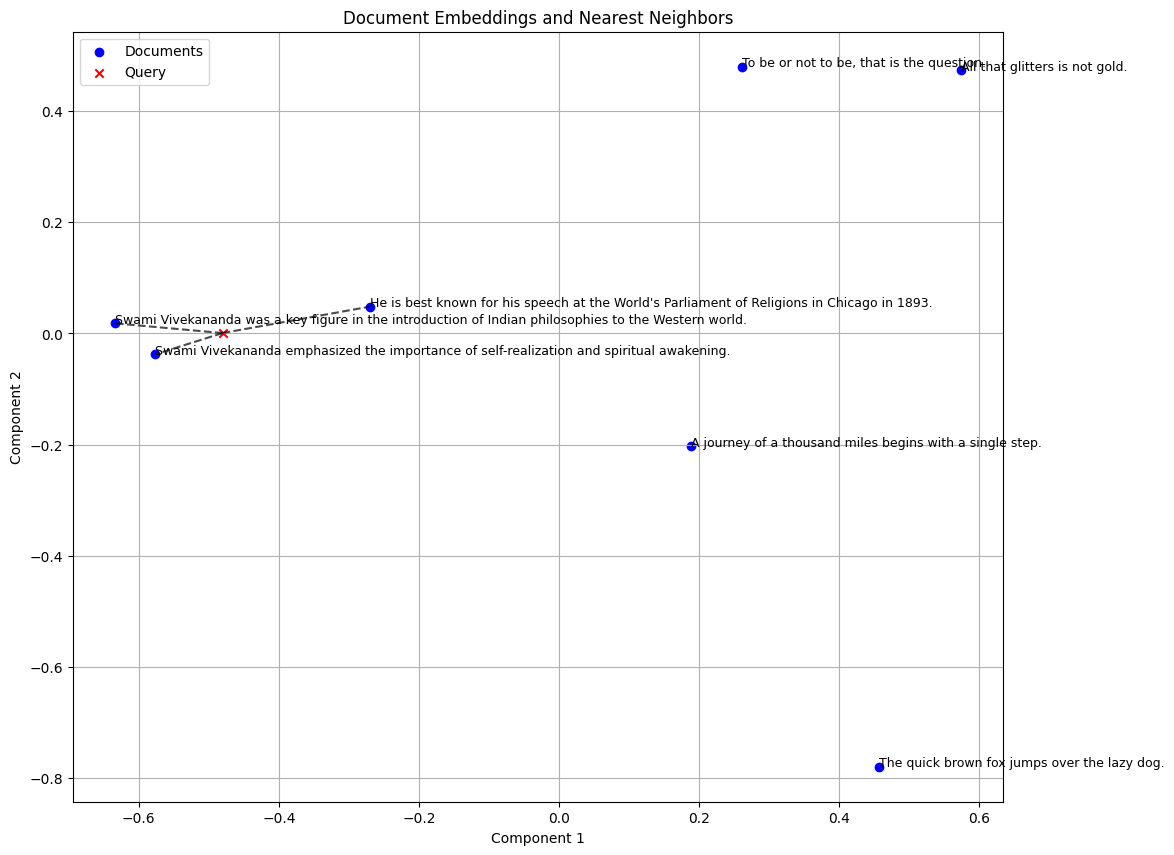

In [40]:
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Reduce the query embedding for plotting
query_reduced = pca.transform(query_embedding)

# Plotting
plt.figure(figsize=(12, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], label='Documents', c='blue')
plt.scatter(query_reduced[:, 0], query_reduced[:, 1], label='Query', c='red', marker='x')

# Annotate documents
for i, txt in enumerate(documents):
    plt.annotate(txt, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9)

# Draw lines to nearest neighbors
for i in range(len(nearest_labels)):
    plt.plot([query_reduced[0, 0], reduced_embeddings[nearest_labels[i], 0]],
             [query_reduced[0, 1], reduced_embeddings[nearest_labels[i], 1]],
             'k--', alpha=0.7)

plt.title('Document Embeddings and Nearest Neighbors')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import hnswlib
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
import warnings
# import csv
warnings.filterwarnings("ignore")



In [8]:
# Initialize the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('intfloat/multilingual-e5-large-instruct')
model = SentenceTransformer('intfloat/multilingual-e5-large-instruct')


In [63]:
# Define English and Bengali documents
english_documents = [
    "Swami Vivekananda was a key figure in the introduction of Indian philosophies to the Western world.",
    "He is best known for his speech at the World's Parliament of Religions in Chicago in 1893.",
    "Swami Vivekananda emphasized the importance of self-realization and spiritual awakening.",
    "My name is Ayantanu Laha"
]

bengali_documents = [
    "স্বামী বিবেকানন্দ পশ্চিমা বিশ্বে ভারতীয় দর্শনসমূহের পরিচয় করানোর গুরুত্বপূর্ণ ব্যক্তিত্ব ছিলেন।",
    "এক হাজার মাইলের যাত্রা একটি একক পদক্ষেপ দিয়ে শুরু হয়।",
    "এক হাজার মাইলের যাত্রা একটি একক পদক্ষেপ দিয়ে শুরু হয়।",
    "থাকা না থাকা, এটিই প্রশ্ন।",
    "যে কিছু ঝলমল করে তা সোনার নয়।",
    "কলম তলোয়ার থেকে শক্তিশালী।",
    "1893 সালে শিকাগোতে ওয়ার্ল্ডস পার্লামেন্ট অফ রিলিজিয়েন্সে তার বক্তৃতার জন্য তিনি সবচেয়ে বেশি পরিচিত।"
]


In [64]:
# Create embeddings
def create_embeddings(documents):
    return model.encode(documents)

english_embeddings = create_embeddings(english_documents)
bengali_embeddings = create_embeddings(bengali_documents)

# Combine embeddings for plotting
combined_embeddings = np.vstack((english_embeddings, bengali_embeddings))
combined_documents = english_documents + bengali_documents
combined_languages = ['English'] * len(english_documents) + ['Bengali'] * len(bengali_documents)


In [65]:
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(combined_embeddings)

In [66]:
# HNSW Setup
dim = combined_embeddings.shape[1]  # Dimension of the embeddings
num_elements = len(combined_documents)  # Number of documents

# Initialize the HNSW index
hnsw_index = hnswlib.Index(space='cosine', dim=dim)
hnsw_index.init_index(max_elements=num_elements, ef_construction=100, M=16)
hnsw_index.add_items(combined_embeddings)

In [67]:
# Define a Bengali query
bengali_query = "স্বামী বিবেকানন্দ পশ্চিমা বিশ্বে ভারতীয় দর্শনসমূহের পরিচয় করানোর গুরুত্বপূর্ণ ব্যক্তিত্ব ছিলেন।"
query_embedding = create_embeddings([bengali_query])

# Perform the search
k = 6
labels, distances = hnsw_index.knn_query(query_embedding, k=k)  # Find top k most similar documents

# Debugging: Print number of neighbors found
print(f"Number of neighbors found: {len(labels[0])}")

# Print similar documents
print("\nSimilar Documents:")
for i, idx in enumerate(labels[0]):
    print(f"Rank {i+1}:")
    print(f"Document: {combined_documents[idx]}")
    print(f"Distance: {distances[0][i]}")
    print()


Number of neighbors found: 6

Similar Documents:
Rank 1:
Document: স্বামী বিবেকানন্দ পশ্চিমা বিশ্বে ভারতীয় দর্শনসমূহের পরিচয় করানোর গুরুত্বপূর্ণ ব্যক্তিত্ব ছিলেন।
Distance: -1.1920928955078125e-07

Rank 2:
Document: Swami Vivekananda was a key figure in the introduction of Indian philosophies to the Western world.
Distance: 0.10447126626968384

Rank 3:
Document: 1893 সালে শিকাগোতে ওয়ার্ল্ডস পার্লামেন্ট অফ রিলিজিয়েন্সে তার বক্তৃতার জন্য তিনি সবচেয়ে বেশি পরিচিত।
Distance: 0.14291447401046753

Rank 4:
Document: Swami Vivekananda emphasized the importance of self-realization and spiritual awakening.
Distance: 0.17162609100341797

Rank 5:
Document: এক হাজার মাইলের যাত্রা একটি একক পদক্ষেপ দিয়ে শুরু হয়।
Distance: 0.21377313137054443

Rank 6:
Document: এক হাজার মাইলের যাত্রা একটি একক পদক্ষেপ দিয়ে শুরু হয়।
Distance: 0.21377313137054443



In [68]:
# Debugging: Print neighbors
print(f"Number of neighbors found: {len(labels[0])}")
print("Labels:", labels)
print("Distances:", distances)


Number of neighbors found: 6
Labels: [[ 4  0 10  2  5  6]]
Distances: [[-1.19209290e-07  1.04471266e-01  1.42914474e-01  1.71626091e-01
   2.13773131e-01  2.13773131e-01]]


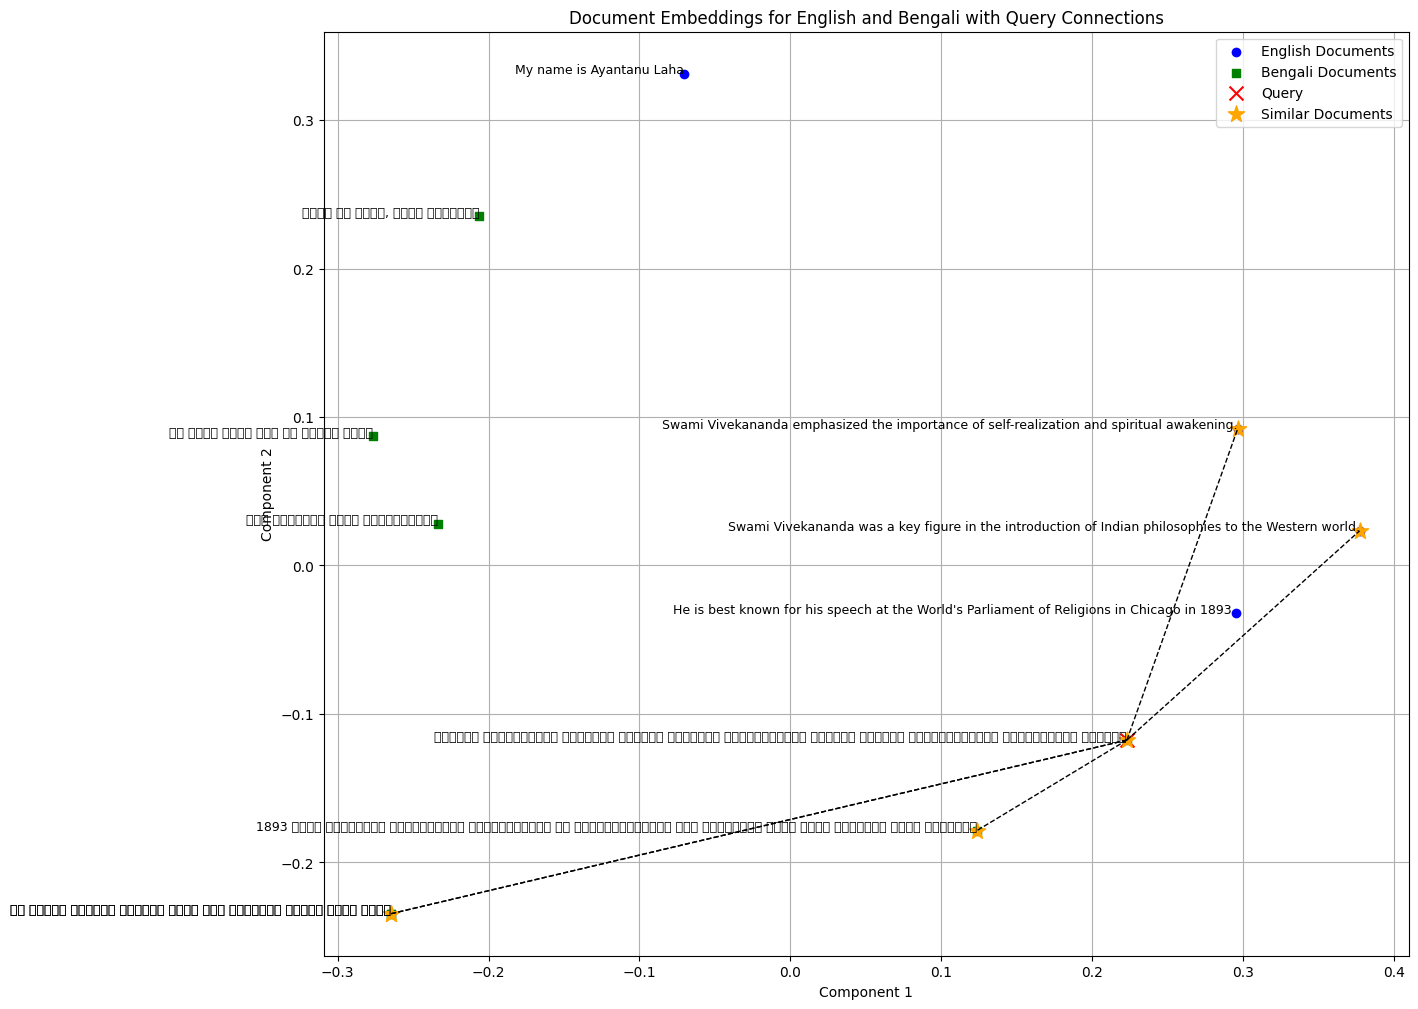

In [69]:

# Plotting
plt.figure(figsize=(14, 12))
plt.scatter(reduced_embeddings[:len(english_documents), 0], reduced_embeddings[:len(english_documents), 1], label='English Documents', c='blue', marker='o')
plt.scatter(reduced_embeddings[len(english_documents):, 0], reduced_embeddings[len(english_documents):, 1], label='Bengali Documents', c='green', marker='s')

# Plot the query
query_reduced = pca.transform(create_embeddings([bengali_query]))  # Reduce the query embedding for plotting
plt.scatter(query_reduced[0, 0], query_reduced[0, 1], c='red', marker='x', s=100, label='Query')

# Annotate documents
for i, txt in enumerate(combined_documents):
    plt.annotate(txt, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9, ha='right')

# Draw edges from query to similar documents
for i in range(len(labels[0])):
    doc_index = labels[0][i]
    plt.plot([query_reduced[0, 0], reduced_embeddings[doc_index, 0]],
             [query_reduced[0, 1], reduced_embeddings[doc_index, 1]],
             'k--', linewidth=1)

# Ensure all neighbors are included
plt.scatter(reduced_embeddings[labels[0], 0], reduced_embeddings[labels[0], 1], c='orange', marker='*', s=150, label='Similar Documents')

plt.title('Document Embeddings for English and Bengali with Query Connections')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()